In [ ]:
import numpy as np
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving pd.zip to pd (1).zip


In [ ]:
import zipfile

with zipfile.ZipFile("pd.zip", "r") as zip_ref:
    zip_ref.extractall("extracted_folder")

In [ ]:
import os

extracted_folder = "extracted_folder"  # The folder where the ZIP file was extracted

# List the files in the extracted folder
extracted_files = os.listdir(extracted_folder)

# Check for the presence of train.csv and test.csv
if "tic_2000_target_data.csv" in extracted_files:
    print("train.csv found in the extracted folder.")
if "tic_2000_train_data.csv" in extracted_files:
    print("test.csv found in the extracted folder.")
else:
    print("no")


train.csv found in the extracted folder.
test.csv found in the extracted folder.


In [ ]:

train_data = pd.read_csv(os.path.join(extracted_folder, "tic_2000_train_data.csv"))
test_data = pd.read_csv(os.path.join(extracted_folder, "tic_2000_target_data.csv"))

#It unzips data from a ZIP file, enumerates the extracted files, and imports two CSV files
#for training and testing data into DataFrames for subsequent operations.

In [ ]:
train_data.shape
#shape

(5822, 86)

In [ ]:
train_data.head
#and display

<bound method NDFrame.head of       MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0          33         1        3         2         8       0       5       1   
1          37         1        2         2         8       1       4       1   
2          37         1        2         2         8       0       4       2   
3           9         1        3         3         3       2       3       2   
4          40         1        4         2        10       1       4       1   
...       ...       ...      ...       ...       ...     ...     ...     ...   
5817       36         1        1         2         8       0       6       1   
5818       35         1        4         4         8       1       4       1   
5819       33         1        3         4         8       0       6       0   
5820       34         1        3         2         8       0       7       0   
5821       33         1        3         3         8       0       6       1   

      MGO

In [ ]:
train_data.sample()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
945,33,1,3,3,8,0,3,4,3,9,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
num_rows, num_columns = train_data.shape
print(f"Number of rows: {num_rows}, Number of columns: {num_columns}")


Number of rows: 5822, Number of columns: 86


In [ ]:
import matplotlib.pyplot as plt

# Select the row you want to display (e.g., row 5820)
row_index = 5820
selected_row = train_data.iloc[row_index, 1:].values

# Convert the data to numeric values (assuming they are numeric strings)
selected_row = pd.to_numeric(selected_row, errors='coerce')

# Check if the converted row has 81 (9x9) elements
if len(selected_row) == 81:
    # Reshape the data into a 23x23 image and display it
    reshaped_data = selected_row.values.reshape(9, 9)
    plt.imshow(reshaped_data, cmap='gray')  # Assuming it's a grayscale image
    plt.show()
else:
    print("Selected row does not have 81 elements after conversion.")


Selected row does not have 81 elements after conversion.


In [ ]:
X = train_data.iloc[:,1:]
y = train_data.iloc[:,0]
print(X,y)


#Obtaining the independent variables involves selecting all rows and columns
#starting from the second column (index 1), while obtaining the dependent variable
# entails selecting all rows from only the first column (index 0).

      MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  MGODGE  \
0            1        3         2         8       0       5       1       3   
1            1        2         2         8       1       4       1       4   
2            1        2         2         8       0       4       2       4   
3            1        3         3         3       2       3       2       4   
4            1        4         2        10       1       4       1       4   
...        ...      ...       ...       ...     ...     ...     ...     ...   
5817         1        1         2         8       0       6       1       2   
5818         1        4         4         8       1       4       1       4   
5819         1        3         4         8       0       6       0       3   
5820         1        3         2         8       0       7       0       2   
5821         1        3         3         8       0       6       1       2   

      MRELGE  MRELSA  ...  APERSONG  AGEZONG  AWAOR

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#splitting data into training and testing sets

In [ ]:
X_train.shape

(4657, 85)

In [ ]:
X_test.shape

(1165, 85)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#init classifier

In [ ]:
knn.fit(X_train,y_train)
KNeighborsClassifier()
#training data using knn

KNeighborsClassifier()

In [ ]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)
#making predictions using X_test

0.19449496269226074


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
#showing accuracy of how much it is accurate using preditions made and tests

0.6412017167381975

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#doing scalar transformation

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)

In [ ]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


#reducing the number of features to 50 components.
# The transformed feature sets, X_train_trf and X_test_trf,
#are created by applying PCA to the training and testing data, respectively

In [ ]:
X_train_trf.shape

(4657, 50)

In [ ]:
X_train_trf

array([[ 1.64348914e+00, -3.20305748e+00,  2.46597491e-01, ...,
         1.82826019e+00,  2.03788472e+00,  3.34542779e-01],
       [-1.77696179e+00, -1.06285986e+00, -6.96949442e-01, ...,
         3.52858255e-01,  2.30486748e-01, -1.28016709e+00],
       [ 6.74504712e-01, -6.84444907e-01, -3.41092256e-01, ...,
        -2.91677094e-01, -3.14789759e-02,  9.78673997e-03],
       ...,
       [-3.68527845e+00, -2.44742630e+00,  3.30722869e-01, ...,
        -5.27506589e-04,  8.12316643e-01, -3.20189446e-01],
       [-7.08588511e+00, -9.16060755e-01, -1.66391529e+00, ...,
         9.14831226e-01, -6.16672310e-01,  4.96621599e-01],
       [-1.47199944e+00,  7.53733724e-01, -1.06262136e+00, ...,
        -2.40994224e+00, -6.85206932e-01, -8.27886264e-01]])

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_trf, y_train)
#training model again

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test_trf)
#predicting using knn

In [ ]:
accuracy_score(y_test, y_pred)

0.542489270386266

In [ ]:
for i in range(1, 10):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    #doing dimension reduction using pca
    knn = KNeighborsClassifier()

    knn.fit(X_train_trf, y_train)

    y_pred = knn.predict(X_test_trf)
    #prediction and checking accuracy
    print(accuracy_score(y_test, y_pred))



0.17854077253218884
0.38969957081545065
0.34678111587982835
0.32875536480686696
0.3785407725321888
0.3742489270386266
0.3579399141630901
0.38369098712446353
0.3888412017167382


In [ ]:
# transforming to a 2D coordinate system
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

#applied dimension reduction using pca

In [ ]:
X_train_trf

array([[ 1.64345543, -3.20368238,  0.24064487],
       [-1.77698467, -1.06345143, -0.70537396],
       [ 0.67448446, -0.68500748, -0.34795294],
       ...,
       [-3.68530471, -2.44842073,  0.32506822],
       [-7.08590007, -0.91701797, -1.66750157],
       [-1.47201339,  0.75280399, -1.07270577]])

In [ ]:
import plotly.express as px
#will be creating scatter pplot
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [ ]:
pca.explained_variance_

array([9.13149119, 4.71228174, 3.98574313])

In [ ]:
pca.components_.shape

(3, 85)

In [ ]:
pca.explained_variance_ratio_
#These ratios indicate the proportion of
#variance explained by each principal component in descending order

array([0.10740624, 0.0554267 , 0.04688103])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)
#calculates the cumulative sum

array([0.10740624, 0.16283294, 0.20971397])

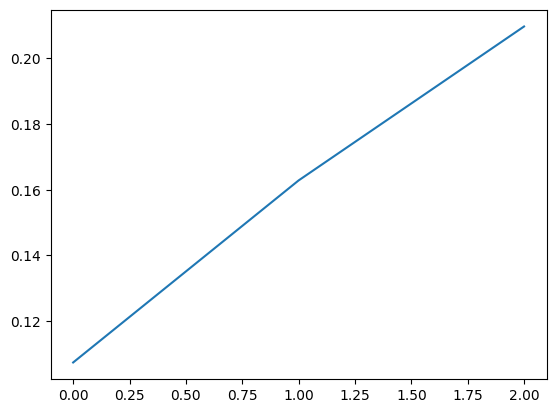

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plotting the cumulative sum